We can increase the results in the Machine Leanring , by using more models

The basic idea is called wisdom of crowds

The idea is that the prediction of the crowd is sometimes better than the predicition of a empirognomona

Usually we have a collection of data we train fit and predict 1 model

How will we be able to create more models?

We use a statistical technique called bootstrap

Bootstrapping is sampling with replacement from observed data to estimate the variability in a statistic of interest

In [1]:
# House prices in California
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing(as_frame=True)
cal_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [2]:
# Target is to predict the price of house
cal_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [3]:
cal_housing.target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

We start using a DecisionTreeRegression ; measuring the Mean Absolute Error

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cal_tree = DecisionTreeRegressor()
cv_scores = cross_val_score(cal_tree,
                            cal_housing.data, 
                            cal_housing.target, 
                            cv=KFold(n_splits=5, shuffle=True),
                            scoring="neg_mean_absolute_error",
                            n_jobs=-1)
print(-cv_scores.mean(), cv_scores.std())

0.46104857800387594 0.005524446023212993


In [5]:
# Population of the data more model
from sklearn.ensemble import BaggingRegressor

bagging_cal_tree = BaggingRegressor(DecisionTreeRegressor(),
                                    n_estimators=50, 
                                    n_jobs=-1)
bagged_cv_scores = cross_val_score(bagging_cal_tree, 
                                   cal_housing.data,
                                   cal_housing.target,
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)

print(-bagged_cv_scores.mean(), bagged_cv_scores.std())

0.3299864216860465 0.0019555379529227683


We can clearly see that more models have resulted to better predictions

A more advanced approach is using random forests

With this technique rather that leaving the algorithm to find the best sample to split into homogenious sets 

We rather : https://en.wikipedia.org/wiki/Random_forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50, n_jobs=-1)
forest_cv_scores = cross_val_score(forest,  
                                   cal_housing.data,
                                   cal_housing.target,
                                   cv=KFold(n_splits=5, shuffle=True),
                                   scoring="neg_mean_absolute_error",
                                   n_jobs=-1)
print(-forest_cv_scores.mean(), forest_cv_scores.std())

0.3307579294476744 0.004027533124190801


Στα ακραίως στοχαστικά δένδρα (extremely randomised trees), επιλέγουμε στοχαστικά όχι μόνο το χαρακτηριστικό για το οποίο θα κάνουμε την ερώτηση σε κάθε κόμβο, αλλά και την τιμή της ερώτησης.

https://stats.stackexchange.com/questions/175523/difference-between-random-forest-and-extremely-randomized-trees

In [7]:
from sklearn.ensemble import ExtraTreesRegressor

extremely_rts = ExtraTreesRegressor(n_estimators=50, n_jobs=-1)

extremely_cv_scores = cross_val_score(extremely_rts, 
                                      cal_housing.data,
                                      cal_housing.target,
                                      cv=KFold(n_splits=5, shuffle=True),
                                      scoring="neg_mean_absolute_error",
                                      n_jobs=-1)
print(-extremely_cv_scores.mean(), extremely_cv_scores.std())

0.3282644820445736 0.0032705505863594286


Note:

It is much easier to explain a single model with a single tree rather than a lot of models with a lot of trees

If we want to see how our combined data make decisions we can examine the feature importances , this gives us how important are the characterestics for that model

In [8]:
import numpy as np

extremely_rts = ExtraTreesRegressor(n_estimators=50, n_jobs=-1)
extremely_rts.fit(cal_housing.data, cal_housing.target)
importances = extremely_rts.feature_importances_

std = np.std([tree.feature_importances_ for tree in extremely_rts.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for i in indices:
    print(cal_housing.feature_names[i], importances[i])

MedInc 0.4928126343150088
Longitude 0.11427355732061081
Latitude 0.11182343956547429
AveOccup 0.1060889639478101
HouseAge 0.07081887868028731
AveRooms 0.042382961389745656
AveBedrms 0.03434645273467903
Population 0.027453112046384023


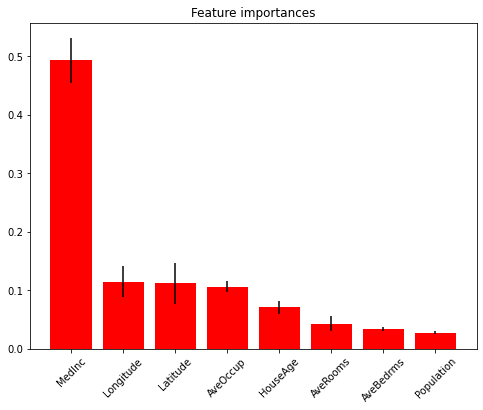

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(len(cal_housing.feature_names)), importances[indices],
        tick_label=[cal_housing.feature_names[x] for x in indices],
        color="r", yerr=std[indices], align="center")
_ = plt.xticks(rotation=45)

A different way to approach designing trees is rather than designing independent trees we can design sequaential models

The idea is that the second model will predict better the things that the first model didnt and so on

Hence for every model we have a better predictions

This is called boosting


In [10]:
from sklearn.ensemble import AdaBoostRegressor

clf = DecisionTreeRegressor()
ada_boost_rgr = AdaBoostRegressor(clf, n_estimators=50)
ada_boost_cv_scores = cross_val_score(ada_boost_rgr, 
                                      cal_housing.data,
                                      cal_housing.target,
                                      cv=KFold(n_splits=5, shuffle=True),
                                      scoring="neg_mean_absolute_error",
                                      n_jobs=-1)
print(-ada_boost_cv_scores.mean(), ada_boost_cv_scores.std())

0.29977949806201554 0.00810372307631671


In [11]:
clf = DecisionTreeRegressor()
ada_boost_rgr = AdaBoostRegressor(clf, n_estimators=50)
ada_boost_rgr.fit(cal_housing.data, cal_housing.target)
importances = ada_boost_rgr.feature_importances_

std = np.std([tree.feature_importances_ for tree in ada_boost_rgr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for i in indices:
    print(cal_housing.feature_names[i], importances[i])

MedInc 0.3017109150951777
AveOccup 0.15312660664288263
Longitude 0.14035684356011488
Latitude 0.14000870636426974
HouseAge 0.07445201515028288
AveRooms 0.0668155361357916
Population 0.06565979259773086
AveBedrms 0.05786958445374963


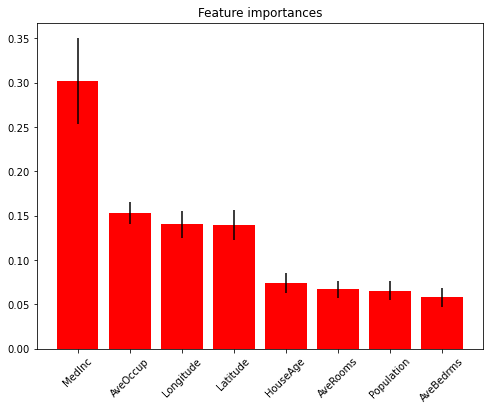

In [12]:
plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(len(cal_housing.feature_names)), importances[indices],
        tick_label=[cal_housing.feature_names[x] for x in indices],
        color="r", yerr=std[indices], align="center")
_ = plt.xticks(rotation=45)

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient.

https://xgboost.readthedocs.io/en/latest/

In [14]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

scores = cross_val_score(xgb_reg, 
                         cal_housing.data, 
                         cal_housing.target, 
                         scoring="neg_mean_absolute_error", 
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

In [15]:
print(-scores.mean(), scores.std())

0.3117547299873302 0.0034390650671531227


In [16]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(cal_housing.data, cal_housing.target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

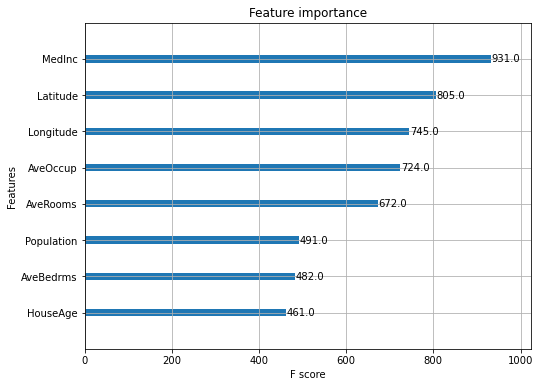

In [17]:
fig = plt.figure(figsize=(8, 6))
xgb_reg.get_booster().feature_names = cal_housing.feature_names
xgb.plot_importance(xgb_reg, ax = fig.gca())

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages

https://lightgbm.readthedocs.io/en/latest/index.html

In [20]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor()
scores = cross_val_score(lgb_reg, 
                         cal_housing.data, 
                         cal_housing.target,
                         scoring="neg_mean_absolute_error",
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

print(-scores.mean(), scores.std())

0.3103196453475895 0.003756718605522089


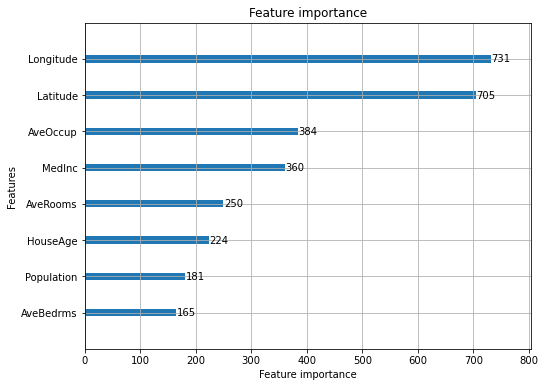

In [21]:
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(cal_housing.data, cal_housing.target, 
            feature_name=cal_housing.feature_names)
_ = lgb.plot_importance(lgb_reg, figsize=(8, 6))

We can see that lightcbm algorithm sets first the longitude and latitude rather than MedInc

We might want to combine different classifiers together

In [22]:
from sklearn.ensemble import VotingRegressor

xgb_reg = xgb.XGBRegressor()
lgb_reg = lgb.LGBMRegressor()
vreg = VotingRegressor(estimators=[('xgb', xgb_reg), 
                                   ('lgb', lgb_reg)],
                       n_jobs=-1)
                       
scores = cross_val_score(vreg, 
                         cal_housing.data, 
                         cal_housing.target,
                         scoring='neg_mean_absolute_error', 
                         cv=KFold(n_splits=5, shuffle=True),
                         n_jobs=-1)

In [23]:
print(-scores.mean(), scores.std())

0.30192112509585217 0.0024880693370002275


Another ways is by using StackingRegressor

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

xgb_reg = xgb.XGBRegressor()
lgb_reg = lgb.LGBMRegressor()

estimators = [('xgb', xgb_reg), ('lgb', lgb_reg)]
final_estimator = LinearRegression()

sreg = StackingRegressor(estimators=estimators, final_estimator=final_estimator, n_jobs=-1)

scores = cross_val_score(sreg, cal_housing.data, cal_housing.target,
                         cv=KFold(n_splits=5, shuffle=True), 
                         scoring='neg_mean_absolute_error', 
                         n_jobs=-1)

In [25]:
print(-scores.mean(), scores.std())

0.30399148534822285 0.005238633842422876


Summary:

Combining different models together is one of the best ways to increase the effectiveness of a Machine Learning Sysytem